# Projects for Analysis of Anti-Depressant Drugs’s Adverse Events by FDA Adverse Event Reporting System (FAERS) from January 2019 to December 2023

## 1. MERGE DATA

In [1]:
# load library
import pandas as pd
import numpy as np
import re

Refer to Code_Research_FDA_MergedOnly.ipynb

## 2. CLEANING DATA

In [2]:
# load merged data
fda = pd.read_csv('./FAERS_19Q1_23Q4.csv', index_col=0)

fda.head()
            

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,...,to_mfr,occp_cod,reporter_country,occr_country,pt,drug_rec_act,outc_cod,rpsr_cod,year,quarter
0,103516324,10351632,10,C,QUETIAPINE.,QUETIAPINE,1,NaN,"25 MG, 1X/DAY (AT BED TIME)",NaN,...,NaN,MD,US,US,Bronchitis,NaN,NaN,NaN,2019,1
1,103516324,10351632,10,C,QUETIAPINE.,QUETIAPINE,1,NaN,"25 MG, 1X/DAY (AT BED TIME)",NaN,...,NaN,MD,US,US,Confusional state,NaN,NaN,NaN,2019,1
2,103516324,10351632,10,C,QUETIAPINE.,QUETIAPINE,1,NaN,"25 MG, 1X/DAY (AT BED TIME)",NaN,...,NaN,MD,US,US,Diarrhoea,NaN,NaN,NaN,2019,1
3,103516324,10351632,10,C,QUETIAPINE.,QUETIAPINE,1,NaN,"25 MG, 1X/DAY (AT BED TIME)",NaN,...,NaN,MD,US,US,Disturbance in attention,NaN,NaN,NaN,2019,1
4,103516324,10351632,10,C,QUETIAPINE.,QUETIAPINE,1,NaN,"25 MG, 1X/DAY (AT BED TIME)",NaN,...,NaN,MD,US,US,Feeling abnormal,NaN,NaN,NaN,2019,1


In [3]:
# check variables
fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257883 entries, 0 to 257882
Data columns (total 56 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         257883 non-null  int64  
 1   caseid            257883 non-null  int64  
 2   drug_seq          257883 non-null  int64  
 3   role_cod          257883 non-null  object 
 4   drugname          257883 non-null  object 
 5   prod_ai           257189 non-null  object 
 6   val_vbm           257883 non-null  int64  
 7   route             195200 non-null  object 
 8   dose_vbm          184718 non-null  object 
 9   cum_dose_chr      5238 non-null    float64
 10  cum_dose_unit     4912 non-null    object 
 11  dechal            180186 non-null  object 
 12  rechal            42655 non-null   object 
 13  lot_num           28560 non-null   object 
 14  exp_dt            958 non-null     float64
 15  nda_num           82059 non-null   float64
 16  dose_amt          149501 

In [4]:
# check variables
fda.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq', 'indi_drug_seq', 'indi_pt',
       'dsg_drug_seq', 'start_dt', 'end_dt', 'dur', 'dur_cod', 'caseversion',
       'i_f_code', 'event_dt', 'mfr_dt', 'init_fda_dt', 'fda_dt', 'rept_cod',
       'auth_num', 'mfr_num', 'mfr_sndr', 'lit_ref', 'age', 'age_cod',
       'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod', 'rept_dt', 'to_mfr',
       'occp_cod', 'reporter_country', 'occr_country', 'pt', 'drug_rec_act',
       'outc_cod', 'rpsr_cod', 'year', 'quarter'],
      dtype='object')

In [5]:
# convert to lower case and remove special character
import pandas as pd

def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters except space
    return text

fda = fda.applymap(clean_text)

# Display the cleaned DataFrame
print(fda)

/var/folders/_z/wx40qqws337c64bjr5v3vh_80000gn/T/ipykernel_59017/1924269341.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fda = fda.applymap(clean_text)


        primaryid    caseid  drug_seq role_cod     drugname      prod_ai  \
0       103516324  10351632        10        c   quetiapine   quetiapine   
1       103516324  10351632        10        c   quetiapine   quetiapine   
2       103516324  10351632        10        c   quetiapine   quetiapine   
3       103516324  10351632        10        c   quetiapine   quetiapine   
4       103516324  10351632        10        c   quetiapine   quetiapine   
...           ...       ...       ...      ...          ...          ...   
257878  233519781  23351978         1       ps   alprazolam   alprazolam   
257879  233519781  23351978         2       ss    bupropion    bupropion   
257880  233519781  23351978         2       ss    bupropion    bupropion   
257881  233523051  23352305         1       ps  mirtazapine  mirtazapine   
257882  233523051  23352305         1       ps  mirtazapine  mirtazapine   

        val_vbm    route                 dose_vbm  cum_dose_chr  ... to_mfr  \
0       

In [6]:
# create timeline variable
def convert_to_datetime(year, quarter):
    # Map the quarter to the corresponding starting month of that quarter
    quarter_to_month = {
        1: '01',  # Q1 starts in January
        2: '04',  # Q2 starts in April
        3: '07',  # Q3 starts in July
        4: '10'   # Q4 starts in October
    }
    # Create date string in the format "YYYY-MM-DD"
    date_str = f"{year}-{quarter_to_month[quarter]}"
    # Convert to datetime
    return pd.to_datetime(date_str)

fda['faers_date'] = fda.apply(lambda row: convert_to_datetime(row['year'], row['quarter']), axis=1)

print(fda)

        primaryid    caseid  drug_seq role_cod     drugname      prod_ai  \
0       103516324  10351632        10        c   quetiapine   quetiapine   
1       103516324  10351632        10        c   quetiapine   quetiapine   
2       103516324  10351632        10        c   quetiapine   quetiapine   
3       103516324  10351632        10        c   quetiapine   quetiapine   
4       103516324  10351632        10        c   quetiapine   quetiapine   
...           ...       ...       ...      ...          ...          ...   
257878  233519781  23351978         1       ps   alprazolam   alprazolam   
257879  233519781  23351978         2       ss    bupropion    bupropion   
257880  233519781  23351978         2       ss    bupropion    bupropion   
257881  233523051  23352305         1       ps  mirtazapine  mirtazapine   
257882  233523051  23352305         1       ps  mirtazapine  mirtazapine   

        val_vbm    route                 dose_vbm  cum_dose_chr  ... occp_cod  \
0     

In [7]:
# check indication
fda['indi_pt'].value_counts()

indi_pt
major depression                                             128891
antidepressant therapy                                        71373
mixed anxiety and depressive disorder                         19345
schizoaffective disorder depressive type                      18527
persistent depressive disorder                                 8545
adjustment disorder with depressed mood                        4720
perinatal depression                                           3430
respiratory depression                                          785
post stroke depression                                          445
antidepressant drug level                                       434
adjustment disorder with mixed anxiety and depressed mood       405
electrocardiogram st segment depression                         222
agitated depression                                             220
antidepressant drug clearance                                   206
menopausal depression                   

In [8]:
# filter non-relevant indication
focused_indi = ['major depression', 'antidepressant therapy', 'mixed anxiety and depressive disorder',
                'persistent depressive disorder', 'adjustment disorder with depressed mood',
                'antidepressant drug level', 'adjustment disorder with mixed anxiety and depressed mood']

filtered_fda = fda[fda['indi_pt'].isin(focused_indi)]

filtered_fda['indi_pt'].value_counts()

indi_pt
major depression                                             128891
antidepressant therapy                                        71373
mixed anxiety and depressive disorder                         19345
persistent depressive disorder                                 8545
adjustment disorder with depressed mood                        4720
antidepressant drug level                                       434
adjustment disorder with mixed anxiety and depressed mood       405
Name: count, dtype: int64

In [9]:
# Calculating value counts
value_counts = filtered_fda['indi_pt'].value_counts()

# Formatting the table into a DataFrame
formatted_table = pd.DataFrame({
    'Indication': value_counts.index,
    'Frequency': value_counts.values
})

column_format = 'l@{}r'

# Exporting to a LaTeX file with custom formatting
latex_table = formatted_table.to_latex(index=False, 
                                       header=True, 
                                       column_format=column_format,
                                       escape=False)

# Exporting to a LaTeX file with custom formatting
latex_table = formatted_table.to_latex(index=False, 
                                       header=True, 
                                       column_format='l c', 
                                       escape=False)

# Save the LaTeX formatted table to a file
with open('focus_indi.tex', 'w') as f:
    f.write(latex_table)

In [10]:
filtered_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233713 entries, 0 to 257882
Data columns (total 57 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   primaryid         233713 non-null  int64         
 1   caseid            233713 non-null  int64         
 2   drug_seq          233713 non-null  int64         
 3   role_cod          233713 non-null  object        
 4   drugname          233713 non-null  object        
 5   prod_ai           233039 non-null  object        
 6   val_vbm           233713 non-null  int64         
 7   route             175820 non-null  object        
 8   dose_vbm          168554 non-null  object        
 9   cum_dose_chr      4997 non-null    float64       
 10  cum_dose_unit     4671 non-null    object        
 11  dechal            158764 non-null  object        
 12  rechal            39108 non-null   object        
 13  lot_num           27290 non-null   object        
 14  exp_dt   

In [11]:
# drop some columns
columns_to_drop = ['rpsr_cod', 'reporter_country', 'to_mfr', 'e_sub', 'age_cod', 'lit_ref',
                   'auth_num', 'dur', 'dur_cod', 'year', 'quarter']

filtered_fda = filtered_fda.drop(columns=columns_to_drop)

print(filtered_fda)

        primaryid    caseid  drug_seq role_cod     drugname      prod_ai  \
0       103516324  10351632        10        c   quetiapine   quetiapine   
1       103516324  10351632        10        c   quetiapine   quetiapine   
2       103516324  10351632        10        c   quetiapine   quetiapine   
3       103516324  10351632        10        c   quetiapine   quetiapine   
4       103516324  10351632        10        c   quetiapine   quetiapine   
...           ...       ...       ...      ...          ...          ...   
257878  233519781  23351978         1       ps   alprazolam   alprazolam   
257879  233519781  23351978         2       ss    bupropion    bupropion   
257880  233519781  23351978         2       ss    bupropion    bupropion   
257881  233523051  23352305         1       ps  mirtazapine  mirtazapine   
257882  233523051  23352305         1       ps  mirtazapine  mirtazapine   

        val_vbm    route                 dose_vbm  cum_dose_chr  ... sex  \
0          

In [12]:
filtered_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233713 entries, 0 to 257882
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   primaryid      233713 non-null  int64         
 1   caseid         233713 non-null  int64         
 2   drug_seq       233713 non-null  int64         
 3   role_cod       233713 non-null  object        
 4   drugname       233713 non-null  object        
 5   prod_ai        233039 non-null  object        
 6   val_vbm        233713 non-null  int64         
 7   route          175820 non-null  object        
 8   dose_vbm       168554 non-null  object        
 9   cum_dose_chr   4997 non-null    float64       
 10  cum_dose_unit  4671 non-null    object        
 11  dechal         158764 non-null  object        
 12  rechal         39108 non-null   object        
 13  lot_num        27290 non-null   object        
 14  exp_dt         917 non-null     float64       
 15  nda_n

In [13]:
filtered_fda.describe().T

,count,mean,min,25%,50%,75%,max,std
primaryid,233713.0,381237016.255433,60994183.0,170084573.0,192556275.0,218728163.0,2300387711.0,517949593.287377
caseid,233713.0,18500838.417461,6099418.0,16523239.0,18583666.0,20458028.0,23352305.0,2648318.404611
drug_seq,233713.0,9.834002,1.0,2.0,4.0,11.0,323.0,16.330262
val_vbm,233713.0,1.002516,1.0,1.0,1.0,1.0,2.0,0.050096
cum_dose_chr,4997.0,10302.654904,0.0,70.0,625.0,3120.0,1332000.0,40392.212462
exp_dt,917.0,20221546.005453,19910101.0,20210630.0,20221119.0,20231130.0,20261031.0,24140.348632
nda_num,75996.0,26593626.406311,99.0,21436.0,77031.0,200834.0,2007500680001.0,7282165193.400571
dose_amt,140084.0,114.726547,0.0,10.0,40.0,100.0,10000.0,423.851705
indi_drug_seq,233713.0,9.834002,1.0,2.0,4.0,11.0,323.0,16.330262
dsg_drug_seq,82588.0,9.779859,1.0,1.0,4.0,12.0,294.0,16.187085


In [14]:
# check role_cod
rename_role_cod = {'PS': 'primary',
                   'SS': 'secondary',
                   'C': 'concomitant',
                   'I': 'interacting'}

filtered_fda['role_cod'] = filtered_fda['role_cod'].replace(rename_role_cod)

filtered_fda['role_cod'].value_counts()

role_cod
ss    93760
c     66537
ps    53792
i     19624
Name: count, dtype: int64

In [15]:
# check drugname
filtered_fda['drugname'].value_counts()

drugname
sertraline                                                             14050
abilify                                                                12074
venlafaxine                                                            11482
mirtazapine                                                             9878
quetiapine                                                              7644
                                                                       ...  
omeprazol pensa 20 mg hard gastroresistant capsules efg 56 capsules        1
trazodone normon 100 mg tablets efg 60 tablets aluminiumpvdcpe bli         1
ambien                                                                     1
dextroamphetamine dexamfetamine                                            1
thymalfasin                                                                1
Name: count, Length: 1213, dtype: int64

In [16]:
# # check prod_ai
filtered_fda['prod_ai'].value_counts()

prod_ai
sertraline hydrochloride     18690
venlafaxine hydrochloride    18496
aripiprazole                 16293
escitalopram oxalate         14310
mirtazapine                  12703
                             ...  
loprazolam                       1
gabapentin enacarbil             1
omalizumab                       1
ferrous sulfate                  1
thymalfasin                      1
Name: count, Length: 397, dtype: int64

In [17]:
# check val_vbm
rename_val_vbm = {1: 'tradename', 2: 'verbatim'}

filtered_fda['val_vbm'] = filtered_fda['val_vbm'].replace(rename_val_vbm)

filtered_fda['val_vbm'].value_counts()

val_vbm
tradename    233125
verbatim        588
Name: count, dtype: int64

In [18]:
# # check reaction
filtered_fda['pt'].value_counts()

pt
drug ineffective                6094
drug interaction                5240
off label use                   4226
suicidal ideation               3549
suicide attempt                 3163
                                ... 
stereotypy                         1
application site exfoliation       1
head banging                       1
disease complication               1
scleral hyperaemia                 1
Name: count, Length: 3660, dtype: int64

In [19]:
# filter none adverse events
values_to_remove = ['drug ineffective', 'drug interaction', 'off label use', 'toxicity to various agents',
                    'product use in unapproved indication', 'condition aggravated', 'intentional product misuse',
                    'product packaging difficult to open', 'loss of personal independence in daily activities',
                    'therapeutic product effect incomplete', 'product use issue', 'economic problem', 'treatment failure',
                    'therapy nonresponder', 'treatment noncompliance', 'inappropriate schedule of product administration',
                    'drug ineffective for unapproved indication', 'product dose omission issue', 'incorrect dose administered',
                    'covid19', 'foetal exposure during pregnancy', 'product substitution issue', 'prescribed overdose',
                    'loss of employment', 'wrong technique in product usage process', 'maternal exposure during pregnancy',
                    'disease recurrence', 'homeless', 'therapy cessation', 'underdose', 'bankruptcy', 'prescribed underdose',
                    'divorced', 'product dose omission', 'drug withdrawal syndrome neonatal', 'therapy interrupted', 'adverse event',
                    'disease progression', 'therapeutic product effect decreased', 'device issue', 'product prescribing error',
                    'adverse drug reaction', 'small for dates baby', 'hospitalisation', 'theft', 'shoplifting',
                    'prescription drug used without a prescription', 'insurance issue', 'therapeutic response unexpected',
                    'unevaluable event', 'wrong product administered', 'road traffic accident', 'product dispensing error',
                    'accidental overdose', 'device malfunction', 'symptom recurrence', 'no adverse event', 'product quality issue',
                    'accident at work', 'drug effective for unapproved indication', 'quality of life decreased',
                    'personal relationship issue', 'multiple drug therapy', 'international normalised ratio increased',
                    'inadequate analgesia', 'incorrect route of product administration', 'unintended pregnancy',
                    'product prescribing issue', 'drug effect less than expected', 'inappropriate affect', 'therapeutic response shortened',
                    'covid19 pneumonia', 'product dose omission in error', 'on and off phenomenon', 'substance use',
                    'labelled drugdrug interaction medication error', 'therapeutic response changed', 'antipsychotic drug level above therapeutic',
                    'drug effect incomplete', 'false positive investigation result', 'adverse reaction', 'expired product administered',
                    'nonspecific reaction', 'selfmedication', 'drugdisease interaction', 'wrong technique in device usage process',
                    'labelled drugdrug interaction issue', 'device leakage', 'post procedural haemorrhage', 'product complaint',
                    'contraindicated product prescribed', 'coronavirus infection', 'product administration error', 'application site reaction']

# Filtering the DataFrame
filtered_fda = filtered_fda[~filtered_fda['pt'].isin(values_to_remove)]

filtered_fda['pt'].value_counts()

pt
suicidal ideation                               3549
suicide attempt                                 3163
serotonin syndrome                              2765
anxiety                                         2396
depression                                      2280
                                                ... 
oral surgery                                       1
hepatic lesion                                     1
tongue injury                                      1
posterior reversible encephalopathy syndrome       1
alcoholic                                          1
Name: count, Length: 3566, dtype: int64

In [20]:
# # check prod_ai
filtered_fda['prod_ai'].value_counts()

prod_ai
sertraline hydrochloride     16591
venlafaxine hydrochloride    15772
escitalopram oxalate         12634
aripiprazole                 12583
mirtazapine                  11138
                             ...  
atorvastatin calcium             1
nifedipine                       1
ferrous sulfate                  1
levonorgestrel                   1
thymalfasin                      1
Name: count, Length: 383, dtype: int64

In [21]:
filtered_fda = filtered_fda[filtered_fda['age'] <= 150]

In [22]:
filtered_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   primaryid      154328 non-null  int64         
 1   caseid         154328 non-null  int64         
 2   drug_seq       154328 non-null  int64         
 3   role_cod       154328 non-null  object        
 4   drugname       154328 non-null  object        
 5   prod_ai        153929 non-null  object        
 6   val_vbm        154328 non-null  object        
 7   route          117690 non-null  object        
 8   dose_vbm       111721 non-null  object        
 9   cum_dose_chr   3920 non-null    float64       
 10  cum_dose_unit  3626 non-null    object        
 11  dechal         103414 non-null  object        
 12  rechal         27798 non-null   object        
 13  lot_num        19364 non-null   object        
 14  exp_dt         739 non-null     float64       
 15  nda_n

In [25]:
filtered_fda['pt'].value_counts()

pt
suicidal ideation               2846
suicide attempt                 2513
serotonin syndrome              2351
depression                      1821
anxiety                         1809
                                ... 
allergic respiratory symptom       1
throat clearing                    1
adenoma benign                     1
benign neoplasm                    1
wrist fracture                     1
Name: count, Length: 3108, dtype: int64

In [24]:
filtered_fda.to_csv('fda_research_20192023.csv')

cleaned_fda = pd.read_csv('./fda_research_20192023.csv', index_col=0)

## 3. CATEGORY ADVERSE EVENTS

In [ ]:
# set up ICD API

#pip install transformers torch tqdm pandas scikit-learn
#pip install requests
#pip install tqdm

import requests
import certifi
import pandas as pd
import re
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# API endpoints and credentials
token_endpoint = 'https://icdaccessmanagement.who.int/connect/token'
client_id = '5efd6836-be6d-4d56-b59f-96fdf05ef690_badcdbaa-e9c8-4c4b-9db9-66c83d460e5f'
client_secret = 'a9X3FpTGp25m3BySg6rLC6J30ziDcccR8X7ItiHcCkc='
scope = 'icdapi_access'
grant_type = 'client_credentials'
base_uri = 'https://id.who.int/icd/entity'


def get_access_token():
    payload = {
        'client_id': client_id,
        'client_secret': client_secret,
        'scope': scope,
        'grant_type': grant_type
    }
    response = requests.post(token_endpoint, data=payload, verify=certifi.where())
    return response.json()['access_token']

def search_icd(query, token):
    headers = {
        'Authorization': f'Bearer {token}',
        'Accept': 'application/json',
        'Accept-Language': 'en',
        'API-Version': 'v2'
    }
    params = {
        'q': query,
        'releaseId': '2023-01',
        'flatResults': 'true'
    }
    response = requests.get(f"{base_uri}/search", headers=headers, params=params, verify=certifi.where())
    return response.json()

token = get_access_token()

# Fetch all ICD descriptions
def fetch_icd_descriptions():
    icd_descriptions = []
    # Example search terms to get a broad set of ICD codes and descriptions
    search_terms = ['disease', 'disorder', 'injury', 'infection', 'neoplasm']
    for term in search_terms:
        results = search_icd(term, token)
        for entity in results.get('destinationEntities', []):
            icd_descriptions.append({
                'id': entity['id'],
                'title': entity['title']
            })
    return pd.DataFrame(icd_descriptions)

icd_data = fetch_icd_descriptions()
print(icd_data.info())
print(icd_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      250 non-null    object
 1   title   250 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB
None
                                        id  \
0  http://id.who.int/icd/entity/1739890344   
1  http://id.who.int/icd/entity/1525792972   
2   http://id.who.int/icd/entity/237422666   
3  http://id.who.int/icd/entity/1473673350   
4  http://id.who.int/icd/entity/1866592137   

                                               title  
0                               Disorders of muscles  
1                                      Arthropathies  
2                Viral infection of unspecified site  
3  <em class='found'>Diseases</em> of the musculo...  
4                                     Mononeuropathy  


In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for a given text
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', max_length=128, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Get embeddings for all ICD descriptions
icd_data['embeddings'] = icd_data['title'].apply(get_embeddings)

/Users/alex/Library/Python/3.9/lib/python/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to 

In [ ]:
# Function to find the best ICD match for a given adverse event description
def find_best_icd_match(description):
    event_embedding = get_embeddings(description)
    similarities = icd_data['embeddings'].apply(lambda x: cosine_similarity([event_embedding], [x]).flatten()[0])
    best_match_idx = similarities.idxmax()
    return icd_data.loc[best_match_idx, 'id'] if similarities[best_match_idx] > 0.5 else None

# Apply the matching function to the adverse event descriptions
tqdm.pandas()
cleaned_fda['icd_code'] = cleaned_fda['pt'].progress_apply(find_best_icd_match)


# Save the updated DataFrame to a CSV file
#fda_data.to_csv('fda_data_with_icd.csv', index=False)
#print("Updated DataFrame saved to 'fda_data_with_icd.csv'")


100%|██████████| 195835/195835 [5:32:48<00:00,  9.81it/s]   


KeyError: 'icd_code'

In [83]:
cleaned_fda = pd.read_csv('./fda_data_with_icd.csv', index_col=0)

In [57]:
cleaned_fda = cleaned_fda[cleaned_fda['age'] <= 150]

print(cleaned_fda['age'].value_counts)
print(cleaned_fda.info())

<bound method IndexOpsMixin.value_counts of 0         46
1         46
2         46
3         46
4         46
          ..
257874    41
257875    41
257876    41
257881    86
257882    86
Name: age, Length: 154328, dtype: int64>
<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   primaryid      154328 non-null  int64  
 1   caseid         154328 non-null  int64  
 2   drug_seq       154328 non-null  int64  
 3   role_cod       154328 non-null  object 
 4   drugname       154328 non-null  object 
 5   prod_ai        153929 non-null  object 
 6   val_vbm        154328 non-null  object 
 7   route          117690 non-null  object 
 8   dose_vbm       111695 non-null  object 
 9   cum_dose_chr   3920 non-null    float64
 10  cum_dose_unit  3626 non-null    object 
 11  dechal         103414 non-null  object 
 12  rechal         27798 non-null  

In [58]:
print(cleaned_fda.info())

<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   primaryid      154328 non-null  int64  
 1   caseid         154328 non-null  int64  
 2   drug_seq       154328 non-null  int64  
 3   role_cod       154328 non-null  object 
 4   drugname       154328 non-null  object 
 5   prod_ai        153929 non-null  object 
 6   val_vbm        154328 non-null  object 
 7   route          117690 non-null  object 
 8   dose_vbm       111695 non-null  object 
 9   cum_dose_chr   3920 non-null    float64
 10  cum_dose_unit  3626 non-null    object 
 11  dechal         103414 non-null  object 
 12  rechal         27798 non-null   object 
 13  lot_num        19362 non-null   object 
 14  exp_dt         739 non-null     float64
 15  nda_num        45895 non-null   float64
 16  dose_amt       95276 non-null   float64
 17  dose_unit      95276 non-null   ob

In [59]:
cleaned_fda['sex'] = cleaned_fda['sex'].replace({'f': 'female',
                                                 'm': 'male',
                                                 'unk': 'other',
                                                 't': 'other'})

print(cleaned_fda['sex'].value_counts())

sex
female    87175
male      66493
other         6
Name: count, dtype: int64


In [60]:
cleaned_fda['age_grp'].value_counts()

age_grp
a    21386
e     3951
t     1219
c       59
n        9
Name: count, dtype: int64

In [61]:
print(cleaned_fda['occr_country'].value_counts().head(10))

occr_country
us    35809
ca    23987
gb    15363
fr    13484
es    12862
de     6301
pl     4504
it     4482
pt     3499
jp     3317
Name: count, dtype: int64


In [62]:
cleaned_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   primaryid      154328 non-null  int64  
 1   caseid         154328 non-null  int64  
 2   drug_seq       154328 non-null  int64  
 3   role_cod       154328 non-null  object 
 4   drugname       154328 non-null  object 
 5   prod_ai        153929 non-null  object 
 6   val_vbm        154328 non-null  object 
 7   route          117690 non-null  object 
 8   dose_vbm       111695 non-null  object 
 9   cum_dose_chr   3920 non-null    float64
 10  cum_dose_unit  3626 non-null    object 
 11  dechal         103414 non-null  object 
 12  rechal         27798 non-null   object 
 13  lot_num        19362 non-null   object 
 14  exp_dt         739 non-null     float64
 15  nda_num        45895 non-null   float64
 16  dose_amt       95276 non-null   float64
 17  dose_unit      95276 non-null   ob

In [63]:
# cleaned_fda.to_csv('fda_data_with_icd.csv')

In [64]:
cleaned_fda['icd_code'].value_counts()


icd_code
http://id.who.int/icd/entity/67207871      30097
http://id.who.int/icd/entity/2070699808    12539
http://id.who.int/icd/entity/1791890273     9862
http://id.who.int/icd/entity/1866592137     9580
http://id.who.int/icd/entity/455330172      8778
                                           ...  
http://id.who.int/icd/entity/1614234080        1
http://id.who.int/icd/entity/2069048512        1
http://id.who.int/icd/entity/342704940         1
http://id.who.int/icd/entity/229280356         1
http://id.who.int/icd/entity/198024823         1
Name: count, Length: 83, dtype: int64

In [65]:
# check unique icd code
# unique_icd = cleaned_fda['icd_code'].unique()
# icd_map = {icd_code: '' for icd_code in unique_icd}
# print(unique_icd)

# create map files
# import json
# with open('icd_map.json', 'w') as f:
#
#     json.dump(icd_map, f, indent=4)

['http://id.who.int/icd/entity/1791890273'
 'http://id.who.int/icd/entity/2044170142'
 'http://id.who.int/icd/entity/967166961'
 'http://id.who.int/icd/entity/1181425418'
 'http://id.who.int/icd/entity/67207871'
 'http://id.who.int/icd/entity/2070699808'
 'http://id.who.int/icd/entity/435671752'
 'http://id.who.int/icd/entity/808756909'
 'http://id.who.int/icd/entity/260898866'
 'http://id.who.int/icd/entity/1528863768'
 'http://id.who.int/icd/entity/1525792972'
 'http://id.who.int/icd/entity/2055968951'
 'http://id.who.int/icd/entity/1866592137'
 'http://id.who.int/icd/entity/1526938195'
 'http://id.who.int/icd/entity/978690714'
 'http://id.who.int/icd/entity/1373335705'
 'http://id.who.int/icd/entity/587237638'
 'http://id.who.int/icd/entity/914154382'
 'http://id.who.int/icd/entity/455330172'
 'http://id.who.int/icd/entity/1438820135'
 'http://id.who.int/icd/entity/1471747216'
 'http://id.who.int/icd/entity/2072728114'
 'http://id.who.int/icd/entity/426429380'
 'http://id.who.int/ic

In [77]:
# mapping
import json

with open('icd_map.json', 'r') as f:
    icd_map = json.load(f)

cleaned_fda['cate_ae'] = cleaned_fda['icd_code'].map(icd_map)

print(cleaned_fda.head())

# Save the update
cleaned_fda.to_csv('fda_data_with_icd.csv', index=True)

   primaryid    caseid  drug_seq role_cod    drugname     prod_ai    val_vbm  \
0  103516324  10351632        10        c  quetiapine  quetiapine  tradename   
1  103516324  10351632        10        c  quetiapine  quetiapine  tradename   
2  103516324  10351632        10        c  quetiapine  quetiapine  tradename   
3  103516324  10351632        10        c  quetiapine  quetiapine  tradename   
4  103516324  10351632        10        c  quetiapine  quetiapine  tradename   

  route                 dose_vbm  cum_dose_chr  ... wt_cod     rept_dt  \
0   NaN  25 mg 1xday at bed time           NaN  ...     kg  20190225.0   
1   NaN  25 mg 1xday at bed time           NaN  ...     kg  20190225.0   
2   NaN  25 mg 1xday at bed time           NaN  ...     kg  20190225.0   
3   NaN  25 mg 1xday at bed time           NaN  ...     kg  20190225.0   
4   NaN  25 mg 1xday at bed time           NaN  ...     kg  20190225.0   

  occp_cod occr_country                        pt  drug_rec_act  outc_cod 

In [78]:
cleaned_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   primaryid      154328 non-null  int64         
 1   caseid         154328 non-null  int64         
 2   drug_seq       154328 non-null  int64         
 3   role_cod       154328 non-null  object        
 4   drugname       154328 non-null  object        
 5   prod_ai        153929 non-null  object        
 6   val_vbm        154328 non-null  object        
 7   route          117690 non-null  object        
 8   dose_vbm       111695 non-null  object        
 9   cum_dose_chr   3920 non-null    float64       
 10  cum_dose_unit  3626 non-null    object        
 11  dechal         103414 non-null  object        
 12  rechal         27798 non-null   object        
 13  lot_num        19362 non-null   object        
 14  exp_dt         739 non-null     float64       
 15  nda_n

In [90]:
print(cleaned_fda['cate_ae'].value_counts())

cate_ae
amnesia                                                       30097
post traumatic stress disorder                                12539
upper respiratory tract disorders                             12301
disorders of nerve root, plexus or peripheral nerves           9580
dermatoses provoked by physical or environmental factors       8778
                                                              ...  
disruptive behaviour or dissocial disorders                       2
injuries to the thorax                                            2
certain skin disorders attributable to bacterial infection        1
injury of urinary or pelvic organs                                1
inflammatory disorders of the female genital tract                1
Name: count, Length: 71, dtype: int64


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the value counts of the 'cate_ae' column
cate_counts = cleaned_fda['cate_ae'].value_counts().sort_values(ascending=False)
print(cate_counts)

cate_ae
amnesia                                                       30097
post traumatic stress disorder                                12539
upper respiratory tract disorders                             12301
disorders of nerve root, plexus or peripheral nerves           9580
dermatoses provoked by physical or environmental factors       8778
                                                              ...  
disruptive behaviour or dissocial disorders                       2
injuries to the thorax                                            2
inflammatory disorders of the female genital tract                1
injury of urinary or pelvic organs                                1
certain skin disorders attributable to bacterial infection        1
Name: count, Length: 71, dtype: int64


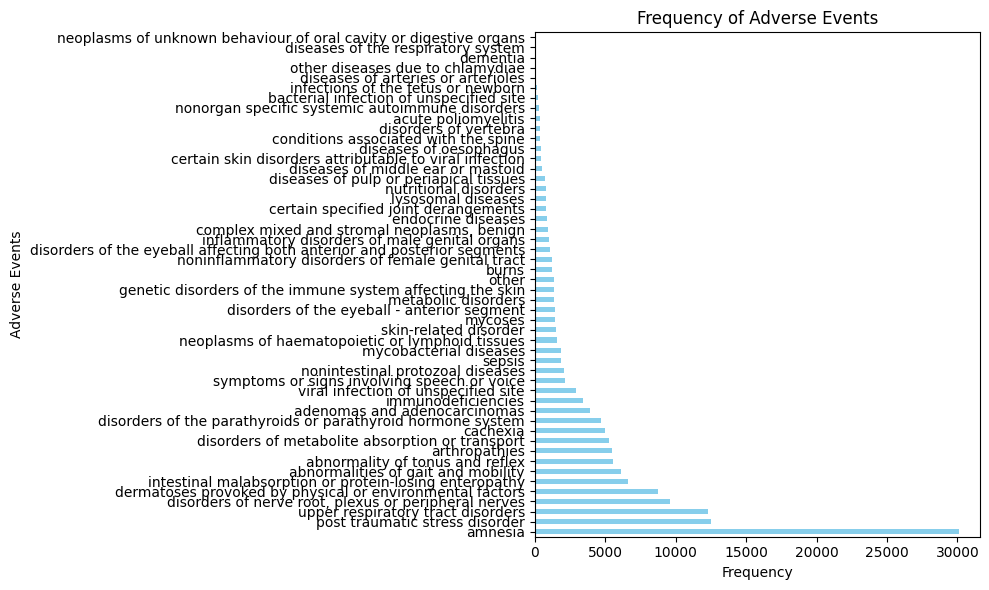

In [85]:
cate_plot = cate_counts.head(50)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
cate_plot.plot(kind='barh', color='skyblue')  # 'barh' creates a horizontal bar chart
plt.title('Frequency of Adverse Events')
plt.xlabel('Frequency')  # X-axis label
plt.ylabel('Adverse Events')  # Y-axis label
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
print(cleaned_fda['age'].value_counts())

age
24.0       13403
44.0        8859
60.0        6740
75.0        6165
65.0        4449
           ...  
26958.0        1
21134.0        1
19029.0        1
23977.0        1
20793.0        1
Name: count, Length: 265, dtype: int64


In [88]:
cleaned_fda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154328 entries, 0 to 257882
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   primaryid      154328 non-null  int64         
 1   caseid         154328 non-null  int64         
 2   drug_seq       154328 non-null  int64         
 3   role_cod       154328 non-null  object        
 4   drugname       154328 non-null  object        
 5   prod_ai        153929 non-null  object        
 6   val_vbm        154328 non-null  object        
 7   route          117690 non-null  object        
 8   dose_vbm       111695 non-null  object        
 9   cum_dose_chr   3920 non-null    float64       
 10  cum_dose_unit  3626 non-null    object        
 11  dechal         103414 non-null  object        
 12  rechal         27798 non-null   object        
 13  lot_num        19362 non-null   object        
 14  exp_dt         739 non-null     float64       
 15  nda_n

/var/folders/_z/wx40qqws337c64bjr5v3vh_80000gn/T/ipykernel_59017/3193958175.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = cleaned_fda.groupby(['faers_date', 'cate_ae']).size().reset_index(name='count')
/var/folders/_z/wx40qqws337c64bjr5v3vh_80000gn/T/ipykernel_59017/3193958175.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = aggregated_data.groupby('cate_ae')['count'].sum().sort_values(ascending=False)


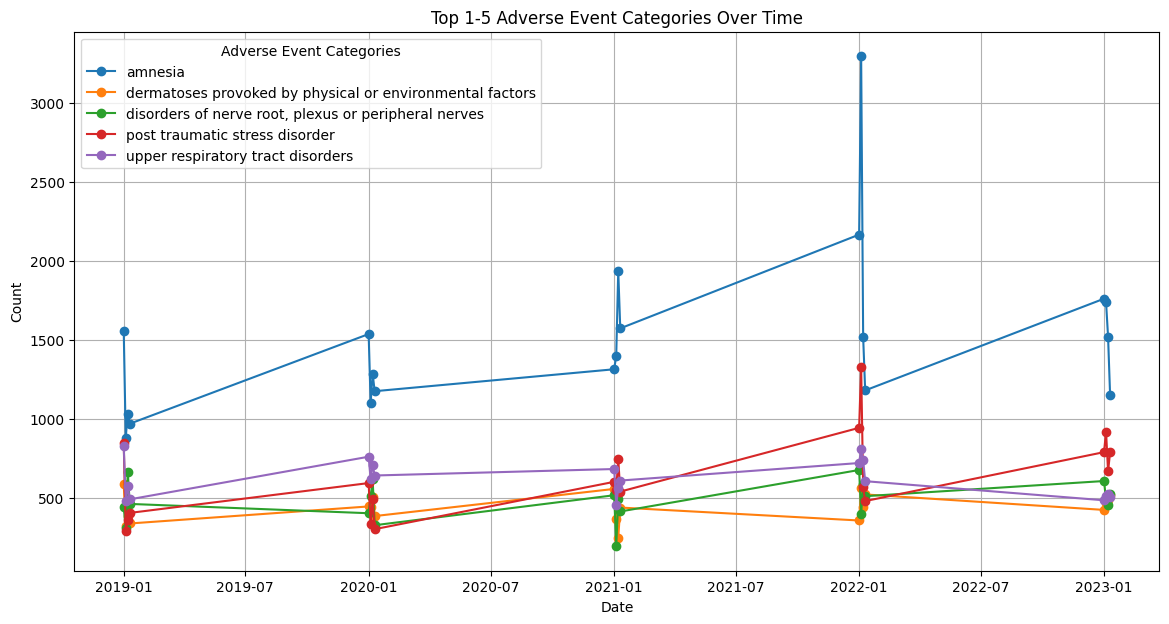

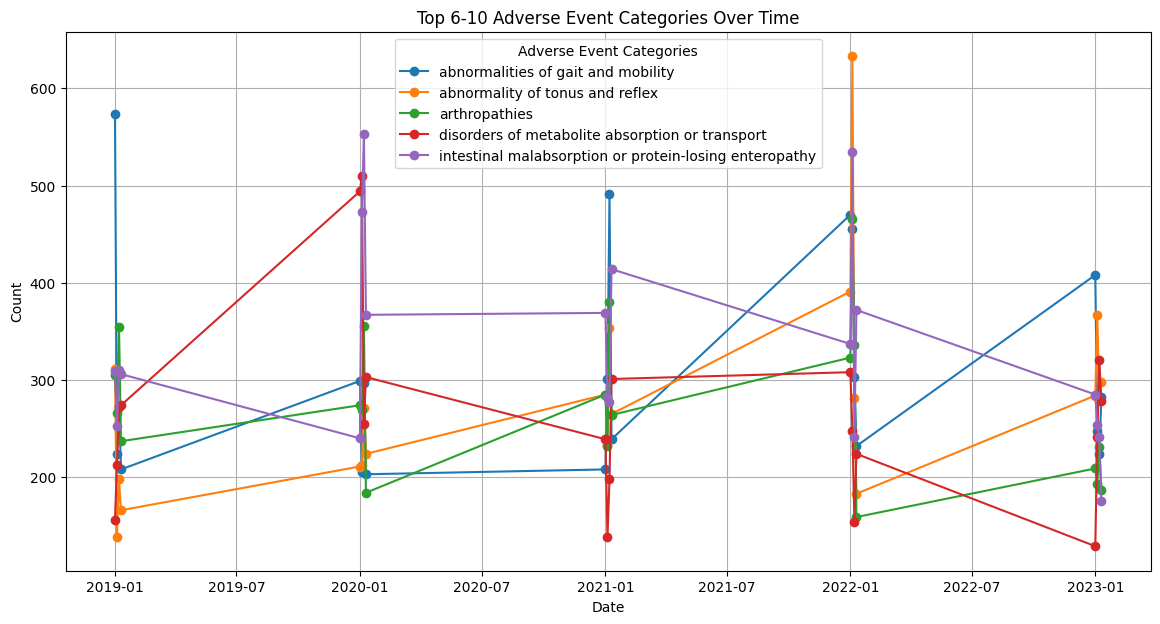

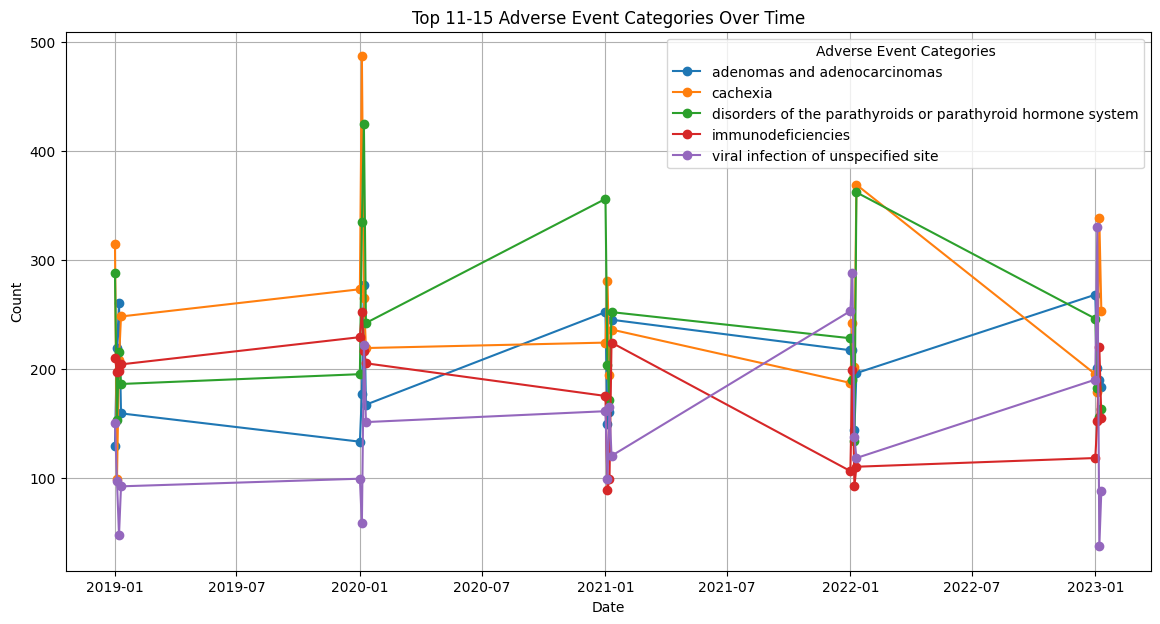

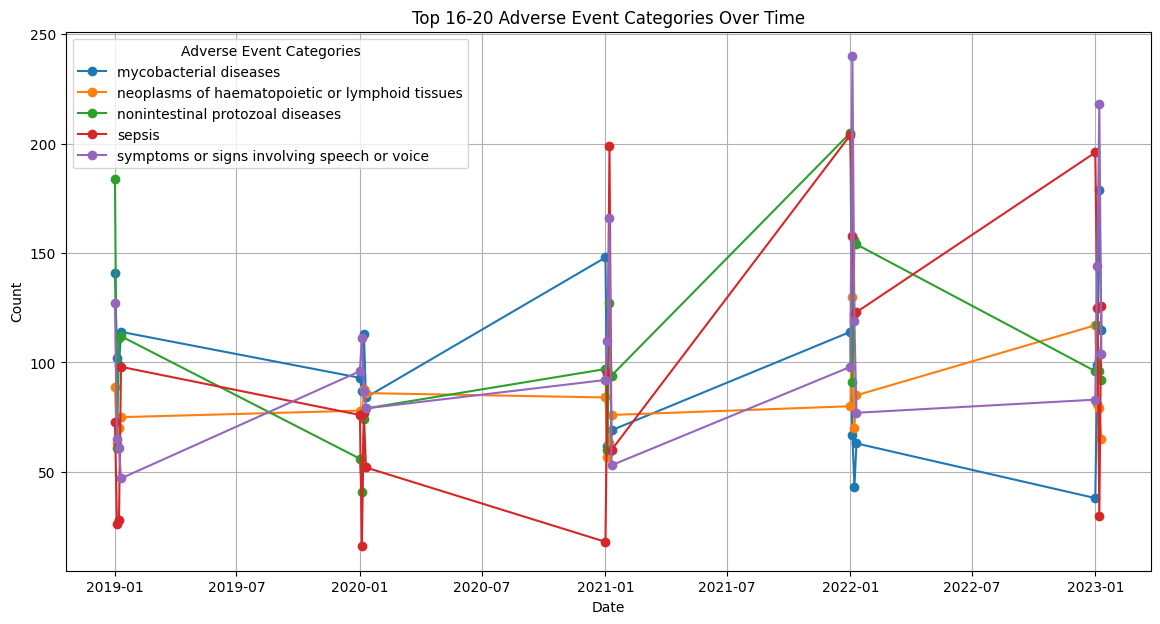

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate the counts by 'faers_date' and 'cate_ae'
aggregated_data = cleaned_fda.groupby(['faers_date', 'cate_ae']).size().reset_index(name='count')

# Calculate the total counts for each category
total_counts = aggregated_data.groupby('cate_ae')['count'].sum().sort_values(ascending=False)

# Identify the top 20 categories
top_20_cate = total_counts.head(20).index

# Filter the aggregated data for these top 20 categories
top_20_data = aggregated_data[aggregated_data['cate_ae'].isin(top_20_cate)]

# Split the top 20 categories into groups of 5 for plotting
groups = [top_20_cate[i:i + 5] for i in range(0, len(top_20_cate), 5)]

# Plotting function
def plot_category_data(data, title):
    plt.figure(figsize=(14, 7))
    categories = data['cate_ae'].unique()
    for category in categories:
        category_data = data[data['cate_ae'] == category]
        plt.plot(category_data['faers_date'], category_data['count'], marker='o', label=category)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend(title='Adverse Event Categories')
    plt.grid(True)
    plt.show()

# Plot each group of 5 categories
for i, group in enumerate(groups):
    group_data = top_20_data[top_20_data['cate_ae'].isin(group)]
    plot_category_data(group_data, f'Top {i*5+1}-{i*5+5} Adverse Event Categories Over Time')

In [91]:
print(cate_counts.tail(10))

cate_ae
neoplasms of unknown behaviour of breast                         12
disorders of muscles                                             12
neoplasms of unknown behaviour of lip, oral cavity or pharynx     9
neoplasms of unknown behaviour of female genital organs           4
disorders of consciousness                                        3
disruptive behaviour or dissocial disorders                       2
injuries to the thorax                                            2
inflammatory disorders of the female genital tract                1
injury of urinary or pelvic organs                                1
certain skin disorders attributable to bacterial infection        1
Name: count, dtype: int64


In [ ]:
#filtered_fda.to_csv('fda_research_20192023.csv')